# Uber Analysis

### Importing the libraries

In [1]:
#Mathematical  Libraries
import numpy as np
import pandas as pd

# Visualizations Libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# DateTime Libraries
import time, datetime

# Remove Warnings
import warnings
warnings.filterwarnings('ignore')

### Loading the Dataframe

In [2]:
#loading the dataframe
df = pd.read_csv("uber.csv")
df.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


**Removing special characters**

In [3]:
#removing special characters
df.columns = df.columns.str.replace("*","")
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [37]:
df.columns

Index(['START_DATE', 'END_DATE', 'CATEGORY', 'START', 'STOP', 'MILES',
       'PURPOSE', 'MINUTES', 'MONTH', 'Hour', 'WEEKDAY', 'SPEED in KMPH',
       'Round_Trip'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START_DATE  1156 non-null   object 
 1   END_DATE    1155 non-null   object 
 2   CATEGORY    1155 non-null   object 
 3   START       1155 non-null   object 
 4   STOP        1155 non-null   object 
 5   MILES       1156 non-null   float64
 6   PURPOSE     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


In [5]:
print("There are {} rows and {} columns are present in the Data Set".format(df.shape[0],df.shape[1]))

There are 1156 rows and 7 columns are present in the Data Set


In [6]:
df.describe()

,MILES
count,1156.000000
mean,21.115398
std,359.299007
min,0.500000
25%,2.900000
50%,6.000000
75%,10.400000
max,12204.700000


### Handling missing values

In [7]:
#checking for null values
df.isnull().sum()

START_DATE      0
END_DATE        1
CATEGORY        1
START           1
STOP            1
MILES           0
PURPOSE       503
dtype: int64

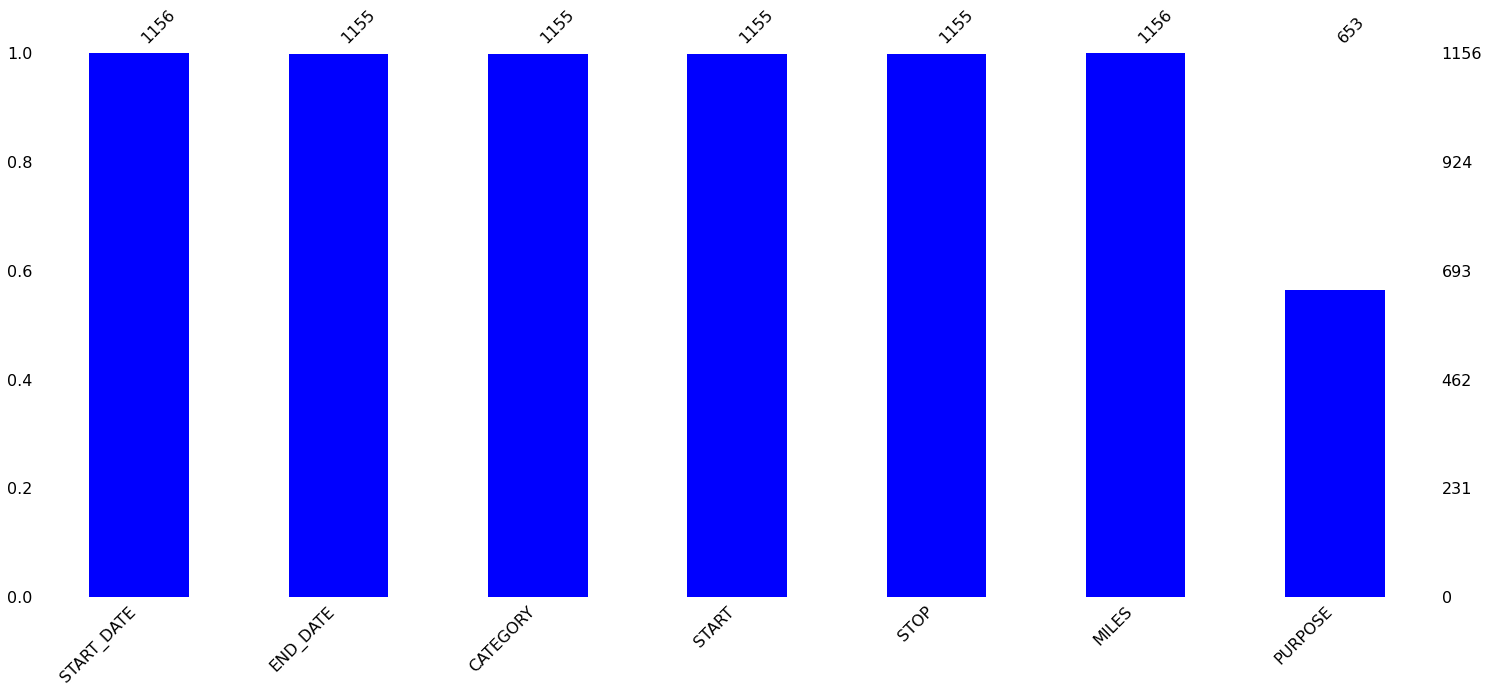

In [8]:
#visualizing the null values for each attribute
import missingno as msno
msno.bar(df,color='b')
plt.show()

In [9]:
#removing the null values of rows
df.drop(index = 1155,axis=0, inplace = True)

In [10]:
#checking for null values
null_columns=df.columns[df.isnull().any()]
df[null_columns].isnull().sum()

PURPOSE    502
dtype: int64

In [11]:
a=df["PURPOSE"].isnull().sum()/len(df)
print(a*100, '% of null values present in the dataset in PURPOSE column')

43.46320346320346 % of null values present in the dataset in PURPOSE column


In [12]:
# filling the null values using fillna() 
#ffill is forwadrd fill 
df["PURPOSE"].fillna(method='ffill', inplace = True) 

In [13]:
df.isnull().sum()

START_DATE    0
END_DATE      0
CATEGORY      0
START         0
STOP          0
MILES         0
PURPOSE       0
dtype: int64

**Now all the NAN values are removed**

### Datetime Conversion

In [14]:
df['START_DATE']= pd.to_datetime(df['START_DATE'],errors='coerce')
df['END_DATE']= pd.to_datetime(df['END_DATE'],errors='coerce')
df.info();


# Now time object type changes to datetime

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1155 entries, 0 to 1154
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   START_DATE  1155 non-null   datetime64[ns]
 1   END_DATE    1155 non-null   datetime64[ns]
 2   CATEGORY    1155 non-null   object        
 3   START       1155 non-null   object        
 4   STOP        1155 non-null   object        
 5   MILES       1155 non-null   float64       
 6   PURPOSE     1155 non-null   object        
dtypes: datetime64[ns](2), float64(1), object(4)
memory usage: 72.2+ KB


### Count of travels as per Category

col_0,Count of travels as per category
CATEGORY,
Business,1078
Personal,77


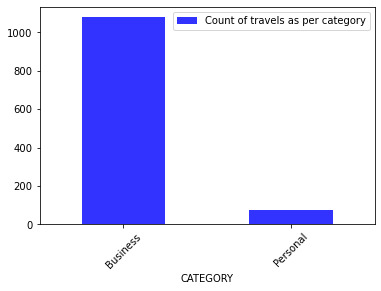

In [77]:
Category =pd.crosstab(index=df['CATEGORY'],columns='Count of travels as per category')
Category.plot(kind='bar',color='b',alpha=0.8)
plt.xticks(rotation=45)
plt.legend()
Category

**Places with Highest start points**

Cary                201
Unknown Location    148
Morrisville          85
Whitebridge          68
Islamabad            57
Durham               37
Lahore               36
Raleigh              28
Kar?chi              27
Westpark Place       17
Apex                 17
Berkeley             16
Midtown              14
R?walpindi           11
Kissimmee            11
Kenner               11
Name: START, dtype: int64


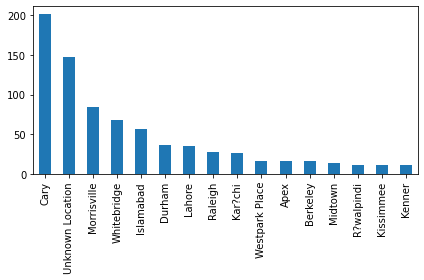

In [17]:
Start_Place = df.START.value_counts()
Start_Place
print(Start_Place[Start_Place > 10])

Start_Place[Start_Place> 10].plot(kind = "bar")
plt.tight_layout()
plt.show()


**Start and Stop points with low values**

In [18]:
#less number of starting points
Start_Place = df.START.value_counts()
Start_Place
Start_Place[Start_Place <=  10]

Emeryville     10
New Orleans    10
Downtown        9
Banner Elk      8
Orlando         8
               ..
Austin          1
Wake Co.        1
Sugar Land      1
Tenderloin      1
Summerwinds     1
Name: START, Length: 161, dtype: int64

In [19]:
#Which are the places are having Least STOP points
Stop_Place = df.STOP.value_counts()
Stop_Place
Stop_Place[Stop_Place <=  10]

New Orleans           10
Kenner                10
Edgehill Farms        10
Central                9
Emeryville             9
                      ..
Chalmette              1
Marigny                1
Financial District     1
Fuquay-Varina          1
Summerwinds            1
Name: STOP, Length: 173, dtype: int64

### Maximmum Miles

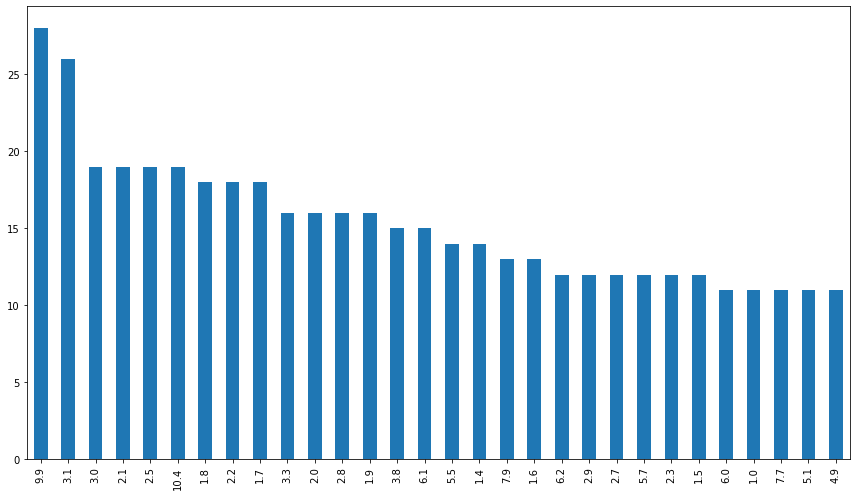

In [20]:
#miles value
Miles = df.MILES.value_counts()
plt.figure(figsize=(12,7))
Miles[Miles> 10].plot(kind = "bar")
plt.tight_layout()
plt.show()


**Places with greater than 10 miles distance**

In [21]:
print(df.PURPOSE.value_counts())

Meeting            308
Meal/Entertain     245
Temporary Site     196
Errand/Supplies    173
Customer Visit     155
Airport/Travel      54
Between Offices     18
Moving               4
Commute              1
Charity ($)          1
Name: PURPOSE, dtype: int64


**Count Plot of Miles**

col_0,Count of Miles
MILES,
False,840
True,315


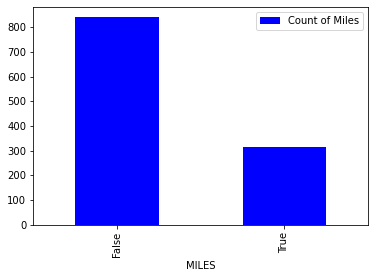

In [39]:
Miles =pd.crosstab(index=df["MILES"]>10,columns='Count of Miles')

Miles.plot(kind='bar',color='b')
plt.legend()
Miles


## Purpose of most cab rides

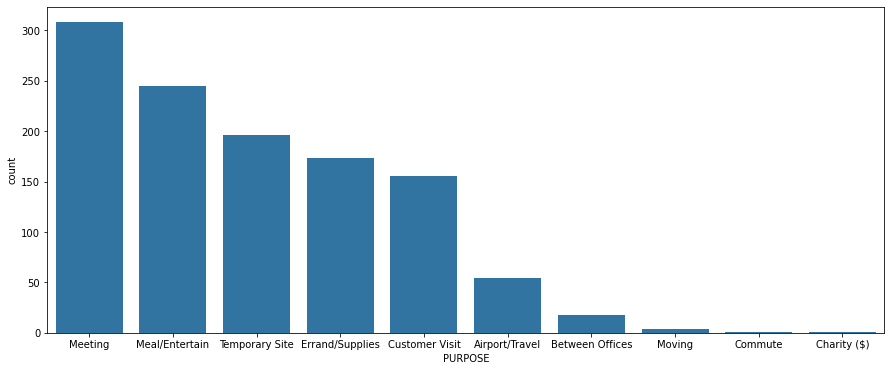

In [23]:
#Purpose of most cab rides
plt.figure(figsize=(15,6))
sns.countplot(df['PURPOSE'], order=df['PURPOSE'].value_counts().index, color=sns.color_palette()[0])
plt.show()

## Relatioship between duration and purpose of Cab rides

**Calculation of duration in Minutes**

In [24]:
# calculation of the duration, as there might be some relation of it to PURPOSE of Cab ride.
df['MINUTES'] = df.END_DATE - df.START_DATE
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,MINUTES
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,0 days 00:06:00
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Meal/Entertain,0 days 00:12:00
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,0 days 00:13:00
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,0 days 00:14:00
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,0 days 01:07:00


**Converting datetime to float type**

In [25]:
# As Duration is in datetime format, we need to convert it to float type in order to use it for analysis.
df['MINUTES'] = df['MINUTES'].dt.total_seconds() /60
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,MINUTES
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,6.0
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Meal/Entertain,12.0
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,13.0
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,14.0
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,67.0


**Grouping Purpose by Miles**

In [26]:
#Grouping Purpose by Mile to find pattern
pd.DataFrame({'MEAN': df.groupby(['PURPOSE'])['MILES'].mean().round(1)}).reset_index()
#Commute has the maximum mean value followed by Customer visit


,PURPOSE,MEAN
0,Airport/Travel,15.0
1,Between Offices,10.9
2,Charity ($),15.1
3,Commute,180.2
4,Customer Visit,16.1
5,Errand/Supplies,5.9
6,Meal/Entertain,5.8
7,Meeting,12.7
8,Moving,4.6
9,Temporary Site,11.0


**BOX plot of MILES and MINUTES**

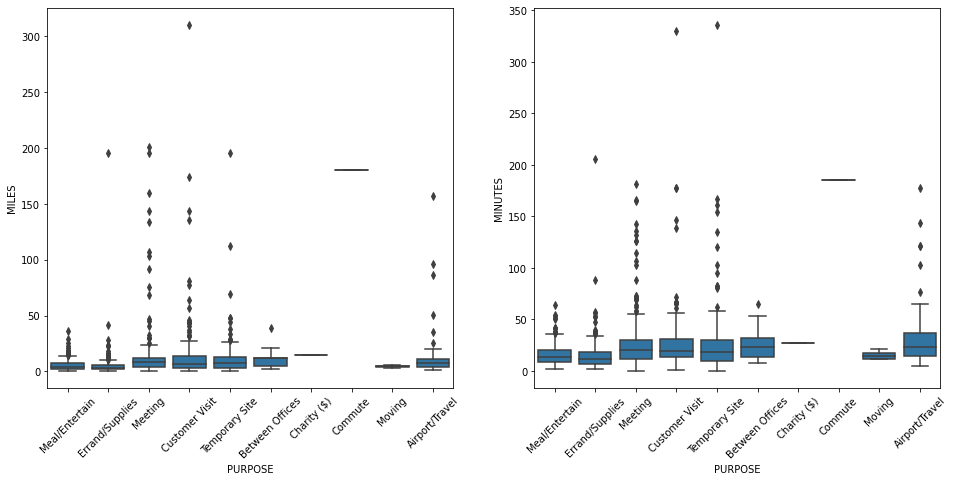

In [27]:
#BOX plot of MILES and MINUTES split by PURPOSE with outliers
plt.figure(figsize=(16,7))
plt.subplot(1,2,1)
sns.boxplot(data=df, x=df.PURPOSE, y=df.MILES,color=sns.color_palette()[0])
plt.xticks(rotation=45)
plt.subplot(1,2,2)
sns.boxplot(data=df, x=df.PURPOSE, y=df.MINUTES,color=sns.color_palette()[0])
plt.xticks(rotation=45);

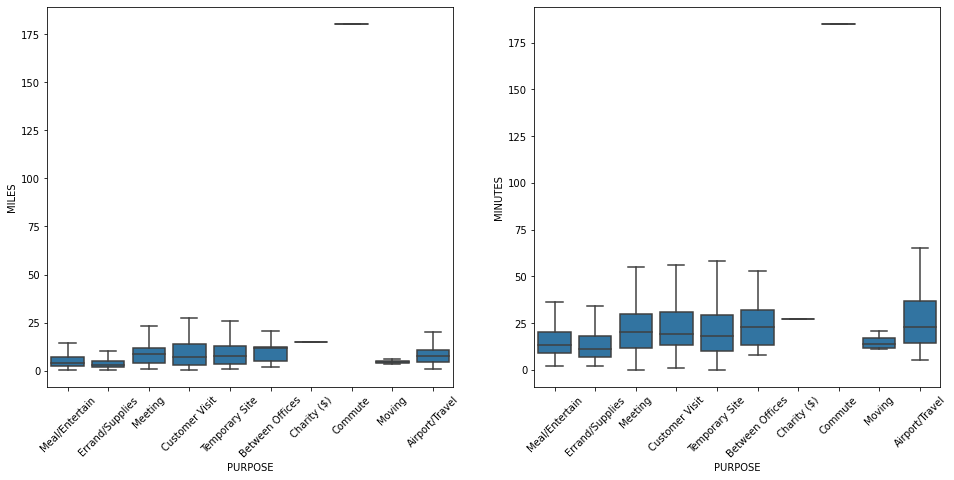

In [28]:
#BOX plot of MILES and MINUTES split by PURPOSE without outliers
plt.figure(figsize=(16,7))
plt.subplot(1,2,1)
sns.boxplot(data=df, x=df.PURPOSE, y=df.MILES,showfliers=False,color=sns.color_palette()[0])
plt.xticks(rotation=45)
plt.subplot(1,2,2)
sns.boxplot(data=df, x=df.PURPOSE, y=df.MINUTES,showfliers=False,color=sns.color_palette()[0])
plt.xticks(rotation=45);

### Frequency of the trips

**Frequency of Trips in each Month**

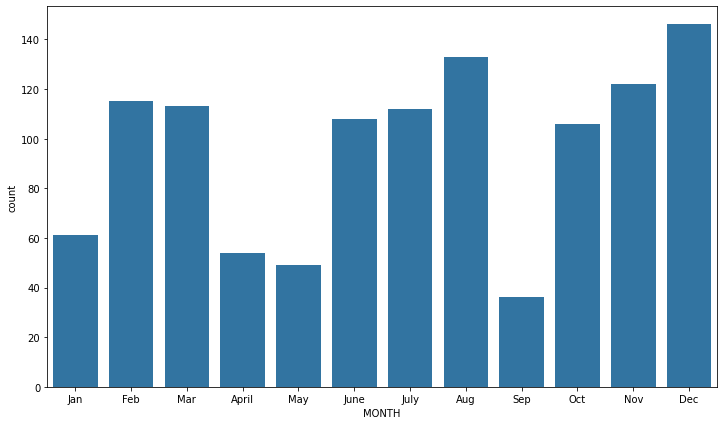

In [29]:
#Entering Month Name and evaluating Frequency of Trip in each Month
df['MONTH'] = pd.DatetimeIndex(df['START_DATE']).month
dic = {1:'Jan', 2: 'Feb', 3: 'Mar', 4: 'April', 5: 'May', 6: 'June', 7: 'July', 8: 'Aug', 9: 'Sep',
      10: 'Oct', 11: 'Nov', 12: 'Dec' }

df['MONTH'] = df['MONTH'].map(dic)

plt.figure(figsize=(12,7))
sns.countplot(df['MONTH'],color=sns.color_palette()[0])
plt.show()



**In Weekdays**

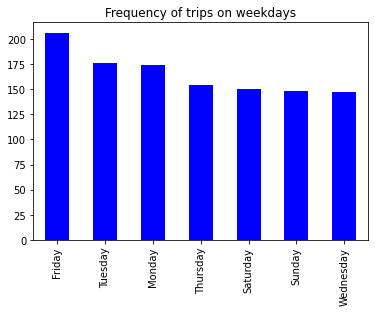

In [30]:
import calendar
hour=[]
day=[]
dayofweek=[]
weekday=[]
for x in df['START_DATE']:
    hour.append(x.hour)
    dayofweek.append(x.dayofweek)
    weekday.append(calendar.day_name[dayofweek[-1]])
df['Hour']=hour
df['WEEKDAY']=weekday

df['WEEKDAY'].value_counts().plot(kind='bar',color='blue')
plt.title('Frequency of trips on weekdays')
plt.show();

### Calculating the Speed of each ride

In [31]:
df['SPEED in KMPH']=df['MILES']/(df['MINUTES']/60)
df.tail()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,MINUTES,MONTH,Hour,WEEKDAY,SPEED in KMPH
1150,2016-12-31 01:07:00,2016-12-31 01:14:00,Business,Kar?chi,Kar?chi,0.7,Meeting,7.0,Dec,1,Saturday,6.000000
1151,2016-12-31 13:24:00,2016-12-31 13:42:00,Business,Kar?chi,Unknown Location,3.9,Temporary Site,18.0,Dec,13,Saturday,13.000000
1152,2016-12-31 15:03:00,2016-12-31 15:38:00,Business,Unknown Location,Unknown Location,16.2,Meeting,35.0,Dec,15,Saturday,27.771429
1153,2016-12-31 21:32:00,2016-12-31 21:50:00,Business,Katunayake,Gampaha,6.4,Temporary Site,18.0,Dec,21,Saturday,21.333333
1154,2016-12-31 22:08:00,2016-12-31 23:51:00,Business,Gampaha,Ilukwatta,48.2,Temporary Site,103.0,Dec,22,Saturday,28.077670


### Plots of MILES with respect to MINUTES

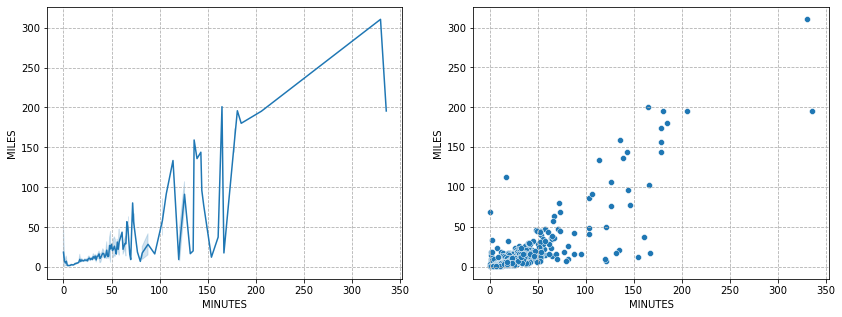

In [32]:
plt.figure(figsize = (14,5))
plt.subplot(1,2,1)
sns.lineplot(data=df, x=df.MINUTES, y=df.MILES)
plt.grid(True, linestyle = "--")
plt.subplot(1,2,2)
sns.scatterplot(data=df, x=df.MINUTES, y=df.MILES)
plt.grid(True, linestyle = "--")

**Some cab rides took more time for less distance**

### Distribution of Cab rides based on Category

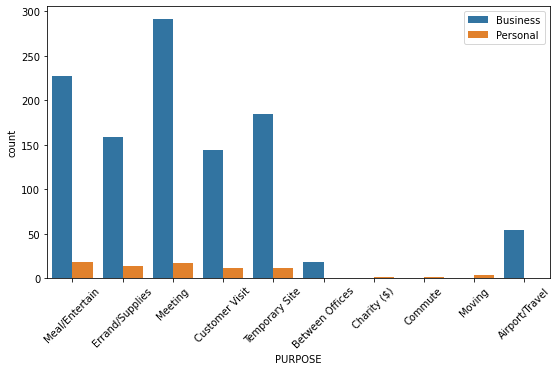

In [33]:
plt.figure(figsize = (9,5))
sns.countplot(data=df,x="PURPOSE", hue = 'CATEGORY')
plt.xticks(rotation = 45)
plt.legend(loc=1);

#The above plot makes clear distinction on the Purpose of Business rides and Personal rides.

### Start Location frequency of cab rides

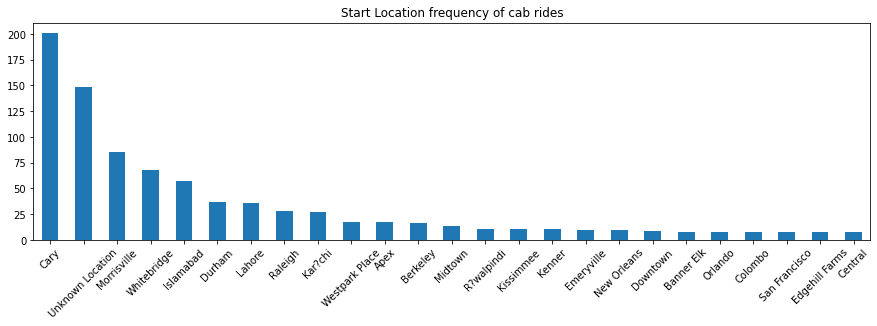

In [34]:
plt.figure(figsize = (15,4))
pd.Series(df['START']).value_counts()[:25].plot(kind="bar")
plt.title("Start Location frequency of cab rides")
plt.xticks(rotation = 45);

### Round Trips 

**Calculating the round trips(start=stop)**

In [35]:
def round(x):
    if x['START'] == x['STOP']:
        return 'YES'
    else:
        return 'NO'
    
df['Round_Trip'] = df.apply(round, axis=1)

**Visualization of round trips**

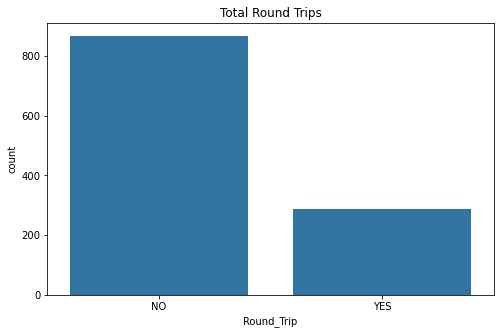

In [75]:
#Visualizing the round trips
plt.figure(figsize=(8,5))
sns.countplot(df['Round_Trip'], order=df['Round_Trip'].value_counts().index,
              color=sns.color_palette()[0])
plt.title('Total Round Trips')
plt.show()


### Round Trip VS Month

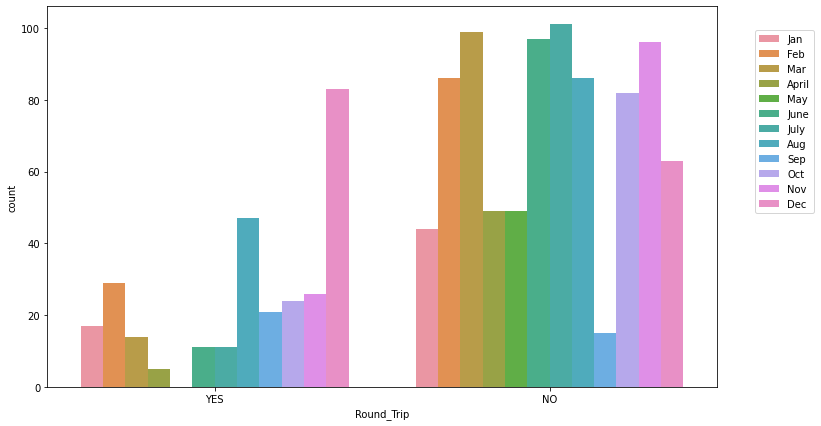

In [42]:
plt.figure(figsize=(12,7))
a=sns.countplot(df['Round_Trip'],hue=df['MONTH'])
plt.legend(bbox_to_anchor=(1.05, 0.95), loc=2)
plt.show()

**Which Hour has the Most number of trips**

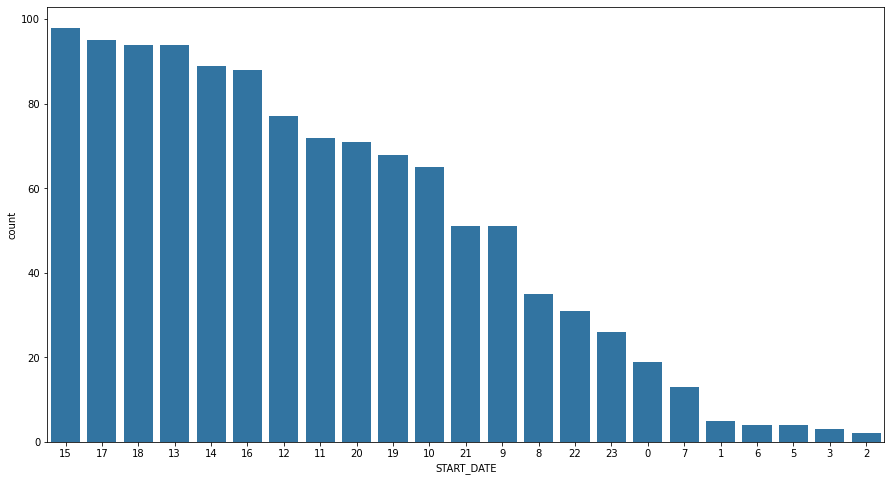

In [44]:
plt.figure(figsize=(15,8))
sns.countplot(df['START_DATE'].dt.hour,color=sns.color_palette()[0] ,
              order = df['START_DATE'].dt.hour.value_counts().index)
plt.show()

### Day Ride vs Night Ride

In [59]:
b= pd.to_datetime(['18:00:00']).time

df['DAY/NIGHT'] = df.apply(lambda x : 'Night Ride' if x['START_DATE'].time() > b else 'Day Ride', axis=1)

df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,MINUTES,MONTH,Hour,WEEKDAY,SPEED in KMPH,Round_Trip,DAY/NIGHT,MILES_BUCKET,MILES_RANGE
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,6.0,Jan,21,Friday,51.000000,YES,Night Ride,0-10 miles,0-10 miles
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Meal/Entertain,12.0,Jan,1,Saturday,25.000000,YES,Day Ride,0-10 miles,0-10 miles
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,13.0,Jan,20,Saturday,22.153846,YES,Night Ride,0-10 miles,0-10 miles
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,14.0,Jan,17,Tuesday,20.142857,YES,Day Ride,0-10 miles,0-10 miles
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,67.0,Jan,14,Wednesday,57.044776,NO,Day Ride,Above 50 miles,Above 50 miles


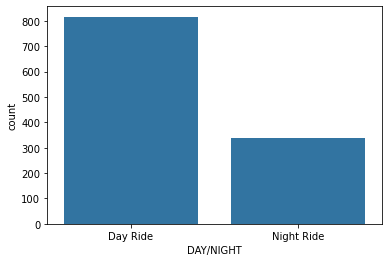

In [60]:
sns.countplot(df['DAY/NIGHT'], color=sns.color_palette()[0] , 
              order = df['DAY/NIGHT'].value_counts().index)

plt.show()

### Range of Miles

In [72]:
f = {}

for i in df['MILES']:
    for i in df['MILES']:
        if i < 20:
            f.setdefault(i,'0-20 miles')
        elif i >= 20 and i < 40:
            f.setdefault(i,'20-40 miles')
        elif i >= 40 and i < 60:
            f.setdefault(i,'40-60 miles')
        elif i >= 60 and i < 80:
            f.setdefault(i,'60-80 miles')
        elif i >= 80 and i < 100:
            f.setdefault(i,'80-100 miles')
        else:
            f.setdefault(i,'Above 100 miles')
            
df['MILES_RANGE'] = df['MILES'].map(f)

In [73]:
df

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,MINUTES,MONTH,Hour,WEEKDAY,SPEED in KMPH,Round_Trip,DAY/NIGHT,MILES_RANGE
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,6.0,Jan,21,Friday,51.000000,YES,Night Ride,0-20 miles
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Meal/Entertain,12.0,Jan,1,Saturday,25.000000,YES,Day Ride,0-20 miles
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,13.0,Jan,20,Saturday,22.153846,YES,Night Ride,0-20 miles
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,14.0,Jan,17,Tuesday,20.142857,YES,Day Ride,0-20 miles
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,67.0,Jan,14,Wednesday,57.044776,NO,Day Ride,60-80 miles
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1150,2016-12-31 01:07:00,2016-12-31 01:14:00,Business,Kar?chi,Kar?chi,0.7,Meeting,7.0,Dec,1,Saturday,6.000000,YES,Day Ride,0-20 miles
1151,2016-12-31 13:24:00,2016-12-31 13:42:00,Business,Kar?chi,Unknown Location,3.9,Temporary Site,18.0,Dec,13,Saturday,13.000000,NO,Day Ride,0-20 miles
1152,2016-12-31 15:03:00,2016-12-31 15:38:00,Business,Unknown Location,Unknown Location,16.2,Meeting,35.0,Dec,15,Saturday,27.771429,YES,Day Ride,0-20 miles
1153,2016-12-31 21:32:00,2016-12-31 21:50:00,Business,Katunayake,Gampaha,6.4,Temporary Site,18.0,Dec,21,Saturday,21.333333,NO,Night Ride,0-20 miles


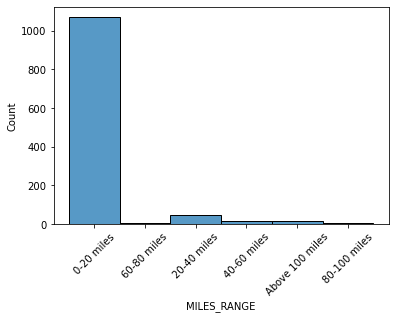

In [74]:
sns.histplot(df['MILES_RANGE'])
plt.xticks(rotation=45)
plt.show()